In this notebook, we will compare the output from NMSSMTools 4.5.1 and NMSSMCALC (as downloaded from last website update on 11.2.15).

**CAVEAT: not checked all inputs are the same (e.g. SM masses, mixing angles etc)**

For the plots below, the following parameter space was scanned:

- $500 < M3 < 2000 $ GeV 

- $500 < MU3, MQ3 < 2500$ GeV

- $500 < AU3 < 3000$ GeV

- $M1$ = 150 GeV, $M2$ = 300 GeV

- $MD3$ = 1 TeV

- $AD3$ = 2.5 TeV

- $\tan \beta \in [1.5, 50]$

- $\mu_{eff} \in [100, 300]\ \mathrm{GeV}$

- $\kappa,\lambda \in [0, 0.7]$

- $A_{\kappa} \in [-30, 2.5]\ \mathrm{GeV}$

- $A_{\lambda} \in [-1000, 4000]\ \mathrm{GeV}$

Note also that:

- All constraints checked against except the LHC ones, and in addition we require 1) $\Delta a_{\mu} > 0$ and 2) $\Omega h^2 < 0.131$

**ANOTHER CAVEAT:** points are checked against experimental cosntraints, as calculated by NMSSMTools. The masses, BRs etc from NMSSMCALC are NOT used (and could potentially change the conclusions of some plots)

- Plots that are labelled 'without experimental constraints' have points that are only required to pass: 
    - $m_h^2 > 1$
    - $m_a^2 >1$
    - $m_{H^\pm}^2 >1$
    - $m_{a_1} < 100\ \mathrm{GeV}$
    
- The switch `I4 = 1` was used in NMSSMTools

- The following results contain plots for both 1-loop and 2-loop masses for NMSSMCALC


In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams['legend.fancybox'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from common_plots import *

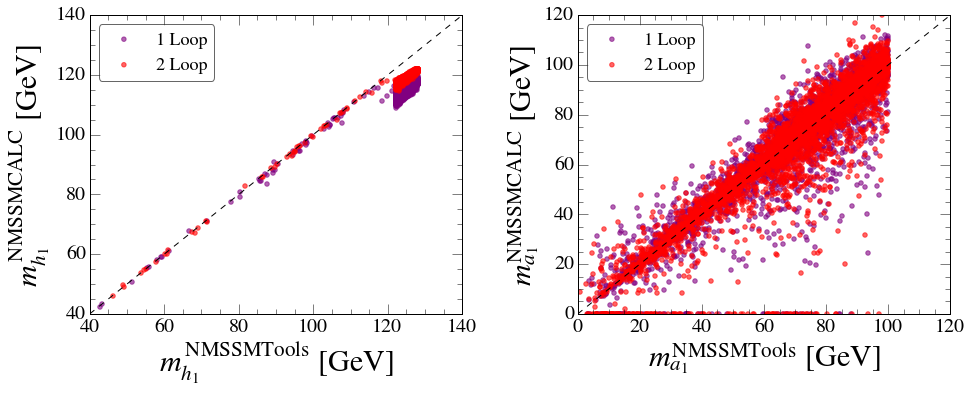

In [82]:
fig = generate_fig()
ax1 = fig.add_subplot(1,2,1)
plot_scatter(ax=ax1, xvar='mh1', yvar='mh1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, color='purple', label='1 Loop', 
             xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}} \ \mathrm{[GeV]}$', 
             ylabel=r'$m_{h_1}^{\mathrm{NMSSMCALC}}\ \mathrm{[GeV]}$', alpha=0.6)
plot_scatter(ax=ax1, xvar='mh1', yvar='mh1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, color='red', label='2 Loop', 
             xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}} \ \mathrm{[GeV]}$', 
             ylabel=r'$m_{h_1}^{\mathrm{NMSSMCALC}}\ \mathrm{[GeV]}$', alpha=0.6)

plt.xlim(40,140)
plt.ylim(40,140)
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), 'k--')
plt.legend(loc=2)

ax2 = fig.add_subplot(1,2,2)
plot_scatter(ax=ax2, xvar='ma1', yvar='ma1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, color='purple', label='1 Loop', 
             xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}} \ \mathrm{[GeV]}$', 
             ylabel=r'$m_{a_1}^{\mathrm{NMSSMCALC}}\ \mathrm{[GeV]}$', alpha=0.6)
plot_scatter(ax=ax2, xvar='ma1', yvar='ma1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, color='red', label='2 Loop', 
             xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}} \ \mathrm{[GeV]}$', 
             ylabel=r'$m_{a_1}^{\mathrm{NMSSMCALC}}\ \mathrm{[GeV]}$', alpha=0.6)

plt.xlim(0,120)
plt.ylim(0,120)
ax2.plot(ax2.get_xlim(), ax2.get_ylim(), 'k--')
plt.legend(loc=2)
# plt.show()

In [3]:
# Unpack dataframes from hdf5 binaries
# I4 = 1 dataset, NMSSMCALC 1 Loop, scanning over M3,MU3,MQ3,AU3 
store_M3MU3MQ3AU3_1LOOP_scan = pd.HDFStore("points_scan_M3MQ3MU3AU3_NMSSMCALC_1LOOP.h5")
df_M3MU3MQ3AU3_1LOOP_orig = store_M3MU3MQ3AU3_1LOOP_scan.full12loop_all
df_M3MU3MQ3AU3_1LOOP_pass_all = store_M3MU3MQ3AU3_1LOOP_scan.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3MU3MQ3AU3_ma1Lt10 = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_M3MU3MQ3AU3_1LOOP_h1SM = store_M3MU3MQ3AU3_1LOOP_scan.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3MU3MQ3AU3_h2SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3MU3MQ3AU3_1LOOP_scan.close()

In [4]:
# Unpack dataframes from hdf5 binaries
# I4 = 1 dataset, NMSSMCALC 2 Loop, scanning over M3,MU3,MQ3,AU3 
store_M3MU3MQ3AU3_2LOOP_scan = pd.HDFStore("points_scan_M3MQ3MU3AU3_NMSSMCALC_2LOOP.h5")
df_M3MU3MQ3AU3_2LOOP_orig = store_M3MU3MQ3AU3_2LOOP_scan.full12loop_all
df_M3MU3MQ3AU3_2LOOP_pass_all = store_M3MU3MQ3AU3_2LOOP_scan.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3MU3MQ3AU3_ma1Lt10 = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_M3MU3MQ3AU3_2LOOP_h1SM = store_M3MU3MQ3AU3_2LOOP_scan.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3MU3MQ3AU3_h2SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3MU3MQ3AU3_2LOOP_scan.close()

In [6]:
print len(df_M3MU3MQ3AU3_1LOOP_pass_all.index), len(df_M3MU3MQ3AU3_2LOOP_pass_all.index)

6832 6847


In [7]:
print len(df_M3MU3MQ3AU3_1LOOP_pass_all[df_M3MU3MQ3AU3_1LOOP_pass_all.ma1<10].index)

41


In [8]:
# experimental constraint on higgs mass 
mh_range = [122.1,128.1] 

#$m_{h_1}$ 

Let's start by looking at the mass of the lightest scalar. Here, `mh1` is from NMSSMTools, `mh1_nc` is from NMSSMCALC.

In [18]:
print 'To 1-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_1LOOP_pass_all.loc[:, ['mh1', 'mh1_nc']].describe(percentiles=[.05, .25, .75, .95])

To 1-loop in NMSSMCALC:


,mh1,mh1_nc
count,6832.000000,6832.000000
mean,124.374661,112.825471
std,4.167626,12.515201
min,4.762163,0.000000
5%,122.290847,111.157018
25%,123.217101,112.751090
50%,124.498579,114.119190
75%,125.972362,115.709966
95%,127.534068,117.571536
max,128.099484,119.489177


In [19]:
print 'To 2-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_2LOOP_pass_all.loc[:, ['mh1', 'mh1_nc']].describe(percentiles=[.05, .25, .75, .95])

To 2-loop in NMSSMCALC:


,mh1,mh1_nc
count,6847.000000,6847.000000
mean,124.441609,116.385879
std,3.917176,16.242672
min,46.121973,0.000000
5%,122.303471,116.393936
25%,123.261832,117.534897
50%,124.529211,118.619041
75%,125.994304,119.862114
95%,127.547064,121.170395
max,128.095708,122.111109


First, let's plot distributions of each:

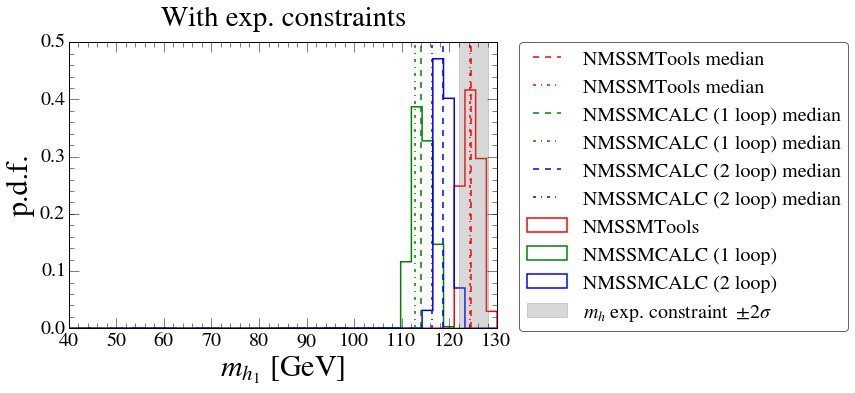

In [125]:
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
xlabel=r'$m_{h_1}\ \mathrm{[GeV]}$'
bins = 40
m_range = [40,130]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
# NMSSMTools
y11, bins11, patches11 = plot_histogram(ax1, var='mh1', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMTools',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='red', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh1', c='red', ls='--', lw=1.5, label='NMSSMTools median')
add_mean_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh1', c='red', ls='-.', lw=1.5, label='NMSSMTools median')
# NMSSMCALC 1 LOOP
y12, bins12, patches12 = plot_histogram(ax1, var='mh1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMCALC (1 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='green', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh1_nc', c='green', ls='--', lw=1.5, label='NMSSMCALC (1 loop) median')
add_mean_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh1_nc', c='green', ls='-.', lw=1.5, label='NMSSMCALC (1 loop) median')
# NMSSMCALC 2 LOOP
y13, bins13, patches13 = plot_histogram(ax1, var='mh1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, label='NMSSMCALC (2 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='blue', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='mh1_nc', c='blue', ls='--', lw=1.5, label='NMSSMCALC (2 loop) median')
add_mean_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='mh1_nc', c='blue', ls='-.', lw=1.5, label='NMSSMCALC (2 loop) median')
# plt.yscale('log')
# plt.ylim(bottom=1E-4)
# plt.ylim(top=max(y11+y12+y13))
make_highlight_region(ax1, mh_range, 'x', color='grey', alpha=0.3, label=r'$m_{h}$ exp. constraint $\pm 2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Let's look at this on a point-by-point basis:

In [126]:
print 'Comparison with NMSSMCALC, 1 loop:'
mh1_1loop_diff = df_M3MU3MQ3AU3_1LOOP_pass_all.mh1.subtract(df_M3MU3MQ3AU3_1LOOP_pass_all.mh1_nc)
mh1_1loop_diff.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 1 loop:


count    6832.000000
mean       11.549190
std        12.145701
min        -1.296508
5%          8.373012
25%         9.665368
50%        10.452590
75%        11.142896
95%        11.930187
max       127.927142
Name: mh1, dtype: float64

In [127]:
print 'Comparison with NMSSMCALC, 2 loop:'
mh1_2loop_diff = df_M3MU3MQ3AU3_2LOOP_pass_all.mh1.subtract(df_M3MU3MQ3AU3_2LOOP_pass_all.mh1_nc)
mh1_2loop_diff.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 2 loop:


count    6847.000000
mean        8.055730
std        15.926160
min        -1.180038
5%          5.021745
25%         5.556641
50%         5.945946
75%         6.321028
95%         6.904635
max       128.077074
Name: mh1, dtype: float64

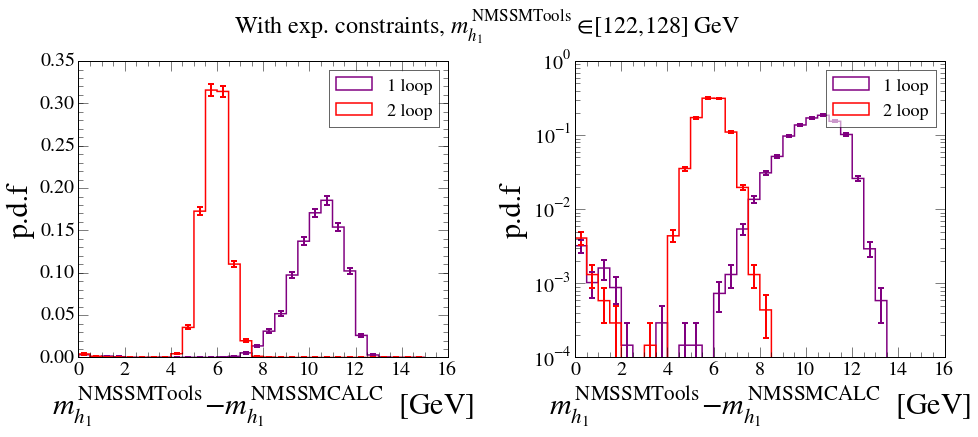

In [152]:
fig = plt.figure()
fig.set_size_inches(14,6)
ax = fig.add_subplot(1,2,1)
bins = 30
m_range = [0,15]
log = False

y11, bins11, patches11 = plot_histogram(ax, array=mh1_1loop_diff.values, label='1 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}-m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y12, bins12, patches12 = plot_histogram(ax, array=mh1_2loop_diff.values, label='2 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}-m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.ylim(bottom=0)
plt.legend(fontsize=18)

ax = fig.add_subplot(1,2,2)
# bins = 40
# m_range = [0,20]
log = True

y21, bins21, patches21 = plot_histogram(ax, array=mh1_1loop_diff.values, label='1 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}-m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y22, bins22, patches22 = plot_histogram(ax, array=mh1_2loop_diff.values, label='2 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}-m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.suptitle(r"With exp. constraints, $m_{h_1}^{\mathrm{NMSSMTools}} \in [122, 128]\ \mathrm{GeV}$", y=1.04)
plt.ylim(bottom=1E-4)
plt.legend(fontsize=18)

We can also plot the ratio between the two values on a point-by-point basis:

In [154]:
print 'Comparison with NMSSMCALC, 1 loop:'
mh1_1loop_ratio = df_M3MU3MQ3AU3_1LOOP_pass_all.mh1.divide(df_M3MU3MQ3AU3_1LOOP_pass_all.mh1_nc)
mh1_1loop_ratio.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 1 loop:


count    6832.000000
mean             inf
std              NaN
min         0.984135
5%          1.071982
25%         1.083960
50%         1.091424
75%         1.098179
95%         1.106104
max              inf
Name: mh1, dtype: float64

In [153]:
print 'Comparison with NMSSMCALC, 2 loop:'
mh1_2loop_ratio = df_M3MU3MQ3AU3_2LOOP_pass_all.mh1.divide(df_M3MU3MQ3AU3_2LOOP_pass_all.mh1_nc)
mh1_2loop_ratio.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 2 loop:


count    6847.000000
mean             inf
std              NaN
min         0.985771
5%          1.042475
25%         1.046911
50%         1.050033
75%         1.052987
95%         1.058075
max              inf
Name: mh1, dtype: float64

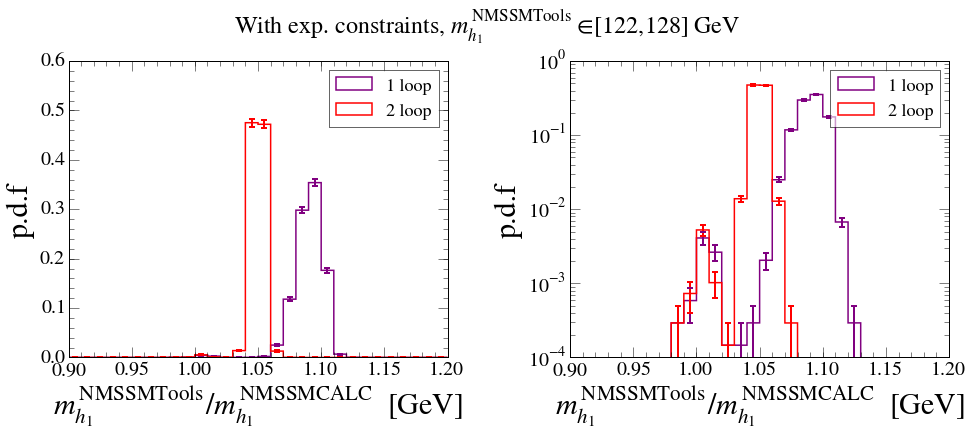

In [162]:
fig = plt.figure()
fig.set_size_inches(14,6)
ax = fig.add_subplot(1,2,1)
bins = 30
m_range = [0.9,1.2]
log = False

y11, bins11, patches11 = plot_histogram(ax, array=mh1_1loop_ratio.values, label='1 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}/m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y12, bins12, patches12 = plot_histogram(ax, array=mh1_2loop_ratio.values, label='2 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}/m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.ylim(bottom=0, top=0.6)
plt.legend(fontsize=18)

ax = fig.add_subplot(1,2,2)
# bins = 40
# m_range = [0,20]
log = True

y21, bins21, patches21 = plot_histogram(ax, array=mh1_1loop_ratio.values, label='1 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}/m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y22, bins22, patches22 = plot_histogram(ax, array=mh1_2loop_ratio.values, label='2 loop', 
                                  xlabel=r'$m_{h_1}^{\mathrm{NMSSMTools}}/m_{h_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.suptitle(r"With exp. constraints, $m_{h_1}^{\mathrm{NMSSMTools}} \in [122, 128]\ \mathrm{GeV}$", y=1.04)
plt.ylim(bottom=1E-4)
plt.legend(fontsize=18)

So we can see that, for the most part, the NMSSMTools value is 5% larger than the 2 loop NMSSMCALC values, and almost 10% larger than the 1 loop value. Note also the smaller bump at 1 - these are points where they agree. So perhaps in the 2-loop calculation there is some common factor missing since the distriution is so peaked?

#$m_{h_2}$ 

We can do the same thing for the second scalar.

In [58]:
print 'To 1-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_1LOOP_pass_all.loc[:, ['mh2', 'mh2_nc']].describe(percentiles=[.05, .25, .75, .95])

To 1-loop in NMSSMCALC:


,mh2,mh2_nc
count,6832.000000,6832.000000
mean,597.355869,590.724663
std,528.835688,532.972662
min,122.154920,0.000000
5%,175.651699,165.999632
25%,292.238762,287.636928
50%,437.110443,431.891247
75%,688.406148,684.800708
95%,1567.150258,1566.563151
max,5729.136340,5735.425920


In [57]:
print 'To 2-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_2LOOP_pass_all.loc[:, ['mh2', 'mh2_nc']].describe(percentiles=[.05, .25, .75, .95])

To 2-loop in NMSSMCALC:


,mh2,mh2_nc
count,6847.000000,6847.000000
mean,599.715697,589.506698
std,528.459031,532.967239
min,122.100671,0.000000
5%,180.443736,166.211622
25%,291.589465,283.567287
50%,441.278032,434.179732
75%,702.381116,696.171355
95%,1581.049459,1568.454825
max,5859.174220,5852.857840


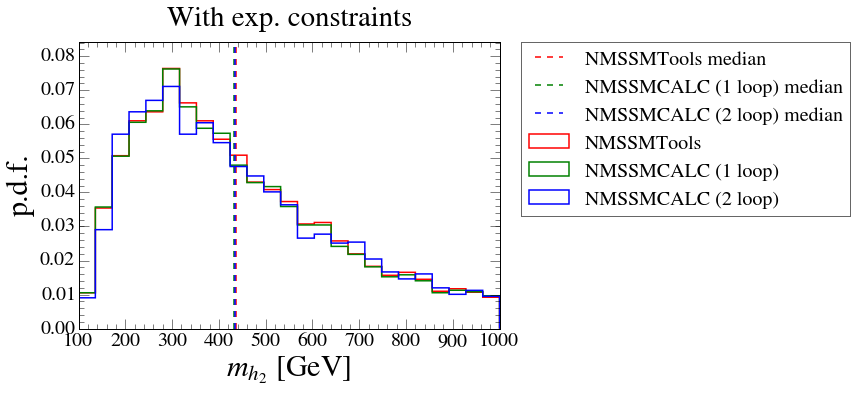

In [83]:
## get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
xlabel=r'$m_{h_2}\ \mathrm{[GeV]}$'
bins = 25
m_range = [100,1000]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
# NMSSMTools
y11, bins11, patches11 = plot_histogram(ax1, var='mh2', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMTools',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='red', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh2', c='red', ls='--', lw=1.5, label='NMSSMTools median')
# NMSSMCALC 1 LOOP
y12, bins12, patches12 = plot_histogram(ax1, var='mh2_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMCALC (1 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='green', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh2_nc', c='green', ls='--', lw=1.5, label='NMSSMCALC (1 loop) median')
# NMSSMCALC 2 LOOP
y13, bins13, patches13 = plot_histogram(ax1, var='mh2_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, label='NMSSMCALC (2 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='blue', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='mh2_nc', c='blue', ls='--', lw=1.5, label='NMSSMCALC (2 loop) median')
plt.xlim(m_range)
plt.ylim(top=1.1*max(np.concatenate([y11, y12, y13])))
# print max(np.concatenate([y11, y12, y13])
# make_highlight_region(ax1, mh_range, 'x', color='grey', alpha=0.3, label=r'$m_{h}$ exp. constraint $\pm 2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

And in the h(125) region, where we consider points that have $m_{h_2} \in [110, 130]$ GeV to compare with the above $m_{h_1}$ plot (limited by v.small stats):

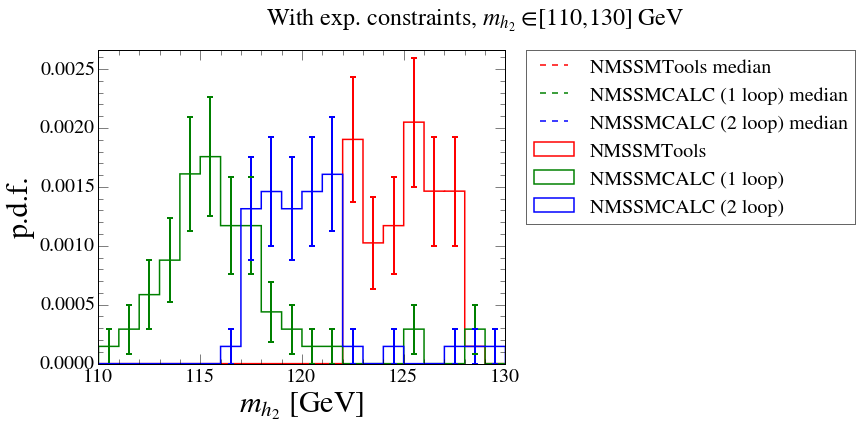

In [104]:
## get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title=''

xlabel=r'$m_{h_2}\ \mathrm{[GeV]}$'
bins = 20
m_range = [110,130]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
# NMSSMTools
y11, bins11, patches11 = plot_histogram(ax1, var='mh2', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMTools',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=True, normed=True,
                                       color='red', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh2', c='red', ls='--', lw=1.5, label='NMSSMTools median')
# NMSSMCALC 1 LOOP
y12, bins12, patches12 = plot_histogram(ax1, var='mh2_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMCALC (1 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=True, normed=True,
                                       color='green', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='mh2_nc', c='green', ls='--', lw=1.5, label='NMSSMCALC (1 loop) median')
# NMSSMCALC 2 LOOP
y13, bins13, patches13 = plot_histogram(ax1, var='mh2_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, label='NMSSMCALC (2 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=True, normed=True,
                                       color='blue', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='mh2_nc', c='blue', ls='--', lw=1.5, label='NMSSMCALC (2 loop) median')
plt.xlim(m_range)
ymax = max(np.concatenate([y11, y12, y13]))
plt.ylim(top=1.3*ymax, bottom=0)
# print max(np.concatenate([y11, y12, y13])
# make_highlight_region(ax1, mh_range, 'x', color='grey', alpha=0.3, label=r'$m_{h}$ exp. constraint $\pm 2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.suptitle(r'With exp. constraints, $m_{h_2} \in [110, 130]\ \mathrm{GeV}$', fontsize=24, y=1.02)

So we see the same effect here, with the masses as correspondingly smaller for NMSSMCALC.

#$m_{a_1}$ 

In [122]:
print 'To 1-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_1LOOP_pass_all.loc[:, ['ma1', 'ma1_nc']].describe(percentiles=[.05, .25, .75, .95])

To 1-loop in NMSSMCALC:


,ma1,ma1_nc
count,6832.000000,6832.000000
mean,71.071046,70.754072
std,21.118847,22.233173
min,3.188046,0.000000
5%,28.802661,27.866380
25%,59.596704,58.282453
50%,74.977902,74.920426
75%,87.960312,88.222514
95%,97.589972,98.481061
max,99.987207,122.761939


In [123]:
print 'To 2-loop in NMSSMCALC:'
df_M3MU3MQ3AU3_2LOOP_pass_all.loc[:, ['ma2', 'ma1_nc']].describe(percentiles=[.05, .25, .75, .95])

To 2-loop in NMSSMCALC:


,ma2,ma1_nc
count,6847.000000,6847.000000
mean,2709.134097,70.844248
std,1054.579336,22.999791
min,311.665653,0.000000
5%,969.225875,24.855137
25%,1937.917675,58.199044
50%,2713.855060,75.488760
75%,3443.375410,88.862961
95%,4477.880153,98.701237
max,6092.193370,122.960159


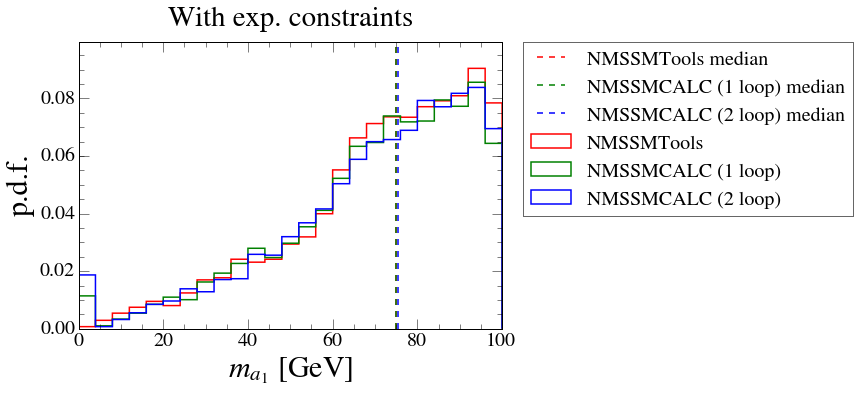

In [107]:
## get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$'
bins = 25
m_range = [0,100]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
# NMSSMTools
y11, bins11, patches11 = plot_histogram(ax1, var='ma1', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMTools',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='red', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='ma1', c='red', ls='--', lw=1.5, label='NMSSMTools median')
# NMSSMCALC 1 LOOP
y12, bins12, patches12 = plot_histogram(ax1, var='ma1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMCALC (1 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='green', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='ma1_nc', c='green', ls='--', lw=1.5, label='NMSSMCALC (1 loop) median')
# NMSSMCALC 2 LOOP
y13, bins13, patches13 = plot_histogram(ax1, var='ma1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, label='NMSSMCALC (2 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=False, normed=True,
                                       color='blue', range=m_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='ma1_nc', c='blue', ls='--', lw=1.5, label='NMSSMCALC (2 loop) median')
plt.xlim(m_range)
plt.ylim(top=1.1*max(np.concatenate([y11, y12, y13])))
# print max(np.concatenate([y11, y12, y13])
# make_highlight_region(ax1, mh_range, 'x', color='grey', alpha=0.3, label=r'$m_{h}$ exp. constraint $\pm 2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Note that the distributions look very similar, however there is glut of point at m = 0. This is from NMSSMCALC (in my analysis script, it defaults to 0 if no suitable nmssmcalc output found) - sometimes it fails to calcualte masses correctly that NMSSMTools has no trouble with (I believe). This requires further investigation.

Let's focus on the low mass region, as that is what we're primarily interested in.

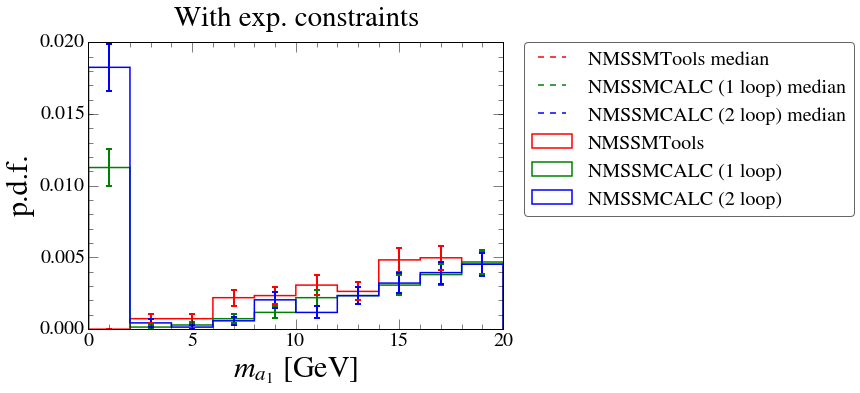

In [84]:
## get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$'
bins = 10
m_range = [0,20]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
errors = True
log = False
# NMSSMTools
y11, bins11, patches11 = plot_histogram(ax1, var='ma1', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMTools',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=errors, normed=True,
                                       color='red', range=m_range, bins=bins, histtype="step", linewidth=1.5, log=log)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='ma1', c='red', ls='--', lw=1.5, label='NMSSMTools median')
# NMSSMCALC 1 LOOP
y12, bins12, patches12 = plot_histogram(ax1, var='ma1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, label='NMSSMCALC (1 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=errors, normed=True,
                                       color='green', range=m_range, bins=bins, histtype="step", linewidth=1.5, log=log)
add_median_line(df_M3MU3MQ3AU3_1LOOP_pass_all, var='ma1_nc', c='green', ls='--', lw=1.5, label='NMSSMCALC (1 loop) median')
# NMSSMCALC 2 LOOP
y13, bins13, patches13 = plot_histogram(ax1, var='ma1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, label='NMSSMCALC (2 loop)',
                                       xlabel=xlabel, ylabel='p.d.f.', title=title, errorbars=errors, normed=True,
                                       color='blue', range=m_range, bins=bins, histtype="step", linewidth=1.5, log=log)
add_median_line(df_M3MU3MQ3AU3_2LOOP_pass_all, var='ma1_nc', c='blue', ls='--', lw=1.5, label='NMSSMCALC (2 loop) median')
plt.xlim(m_range)
plt.ylim(top=0.02, bottom=3E-5)
# make_highlight_region(ax1, mh_range, 'x', color='grey', alpha=0.3, label=r'$m_{h}$ exp. constraint $\pm 2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

On a point-by-point basis:

In [85]:
print 'Comparison with NMSSMCALC, 1 loop:'
ma1_1loop_diff = df_M3MU3MQ3AU3_1LOOP_pass_all.ma1.subtract(df_M3MU3MQ3AU3_1LOOP_pass_all.ma1_nc)
ma1_1loop_diff.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 1 loop:


count    6832.000000
mean        0.316974
std         7.460707
min       -33.578740
5%         -8.412643
25%        -1.728705
50%        -0.090883
75%         0.816155
95%        10.413607
max        88.126894
Name: ma1, dtype: float64

In [86]:
print 'Comparison with NMSSMCALC, 2 loop:'
ma1_2loop_diff = df_M3MU3MQ3AU3_2LOOP_pass_all.ma1.subtract(df_M3MU3MQ3AU3_2LOOP_pass_all.ma1_nc)
ma1_2loop_diff.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 2 loop:


count    6847.000000
mean        0.619324
std         8.228181
min       -28.580692
5%         -7.794581
25%        -1.704116
50%        -0.084320
75%         0.841740
95%        11.629237
max        96.884442
Name: ma1, dtype: float64

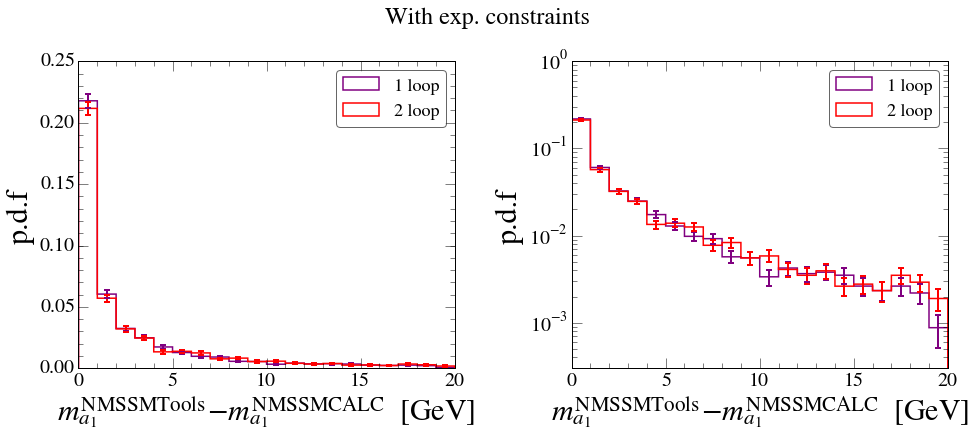

In [91]:
fig = plt.figure()
fig.set_size_inches(14,6)
ax = fig.add_subplot(1,2,1)
bins = 20
m_range = [0,20]
log = False

y11, bins11, patches11 = plot_histogram(ax, array=ma1_1loop_diff.values, label='1 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}-m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y12, bins12, patches12 = plot_histogram(ax, array=ma1_2loop_diff.values, label='2 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}-m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.ylim(bottom=0)
plt.legend(fontsize=18)

ax = fig.add_subplot(1,2,2)
# bins = 40
# m_range = [0,20]
log = True

y21, bins21, patches21 = plot_histogram(ax, array=ma1_1loop_diff.values, label='1 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}-m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y22, bins22, patches22 = plot_histogram(ax, array=ma1_2loop_diff.values, label='2 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}-m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.suptitle(r"With exp. constraints", y=1.04)
plt.ylim(bottom=3E-4)
plt.legend(fontsize=18)

We can also plot the ratio between the two values on a point-by-point basis:

In [92]:
print 'Comparison with NMSSMCALC, 1 loop:'
ma1_1loop_ratio = df_M3MU3MQ3AU3_1LOOP_pass_all.ma1.divide(df_M3MU3MQ3AU3_1LOOP_pass_all.ma1_nc)
ma1_1loop_ratio.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 1 loop:


count    6832.000000
mean             inf
std              NaN
min         0.202957
5%          0.883281
25%         0.975327
50%         0.998686
75%         1.011500
95%         1.202654
max              inf
Name: ma1, dtype: float64

In [93]:
print 'Comparison with NMSSMCALC, 2 loop:'
ma1_2loop_ratio = df_M3MU3MQ3AU3_2LOOP_pass_all.ma1.divide(df_M3MU3MQ3AU3_2LOOP_pass_all.ma1_nc)
ma1_2loop_ratio.describe(percentiles=[.05, .25, .75, .95])

Comparison with NMSSMCALC, 2 loop:


count    6847.000000
mean             inf
std              NaN
min         0.095187
5%          0.890465
25%         0.975957
50%         0.998798
75%         1.011695
95%         1.243300
max              inf
Name: ma1, dtype: float64

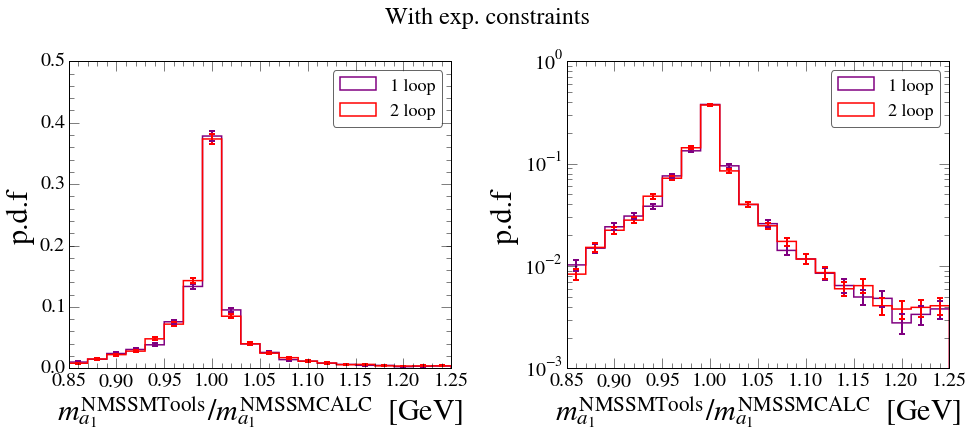

In [100]:
fig = plt.figure()
fig.set_size_inches(14,6)
ax = fig.add_subplot(1,2,1)
bins = 20
m_range = [0.85,1.25]
log = False

y11, bins11, patches11 = plot_histogram(ax, array=ma1_1loop_ratio.values, label='1 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}/m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y12, bins12, patches12 = plot_histogram(ax, array=ma1_2loop_ratio.values, label='2 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}/m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.ylim(bottom=0, top=0.5)
plt.legend(fontsize=18)

ax = fig.add_subplot(1,2,2)
# bins = 40
# m_range = [0,20]
log = True

y21, bins21, patches21 = plot_histogram(ax, array=ma1_1loop_ratio.values, label='1 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}/m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='purple', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
y22, bins22, patches22 = plot_histogram(ax, array=ma1_2loop_ratio.values, label='2 loop', 
                                  xlabel=r'$m_{a_1}^{\mathrm{NMSSMTools}}/m_{a_1}^{\mathrm{NMSSMCALC}}\ \ \mathrm{[GeV]}$', ylabel='p.d.f',
                                  normed=True, color='red', range=m_range, bins=bins, histtype="step", 
                                  linewidth=1.5, log=log)
plt.suptitle(r"With exp. constraints", y=1.04)
plt.ylim(bottom=1E-3)
plt.legend(fontsize=18)

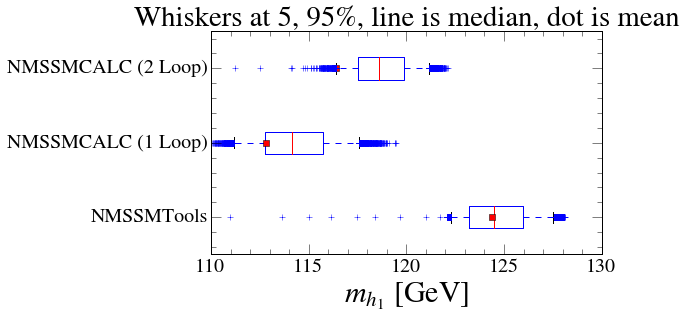

In [142]:
plt.boxplot([df_M3MU3MQ3AU3_1LOOP_pass_all.mh1.values,df_M3MU3MQ3AU3_1LOOP_pass_all.mh1_nc.values, df_M3MU3MQ3AU3_2LOOP_pass_all.mh1_nc.values], 
            sym=None, vert=False, whis=[5, 95], labels=['NMSSMTools', 'NMSSMCALC (1 Loop)', 'NMSSMCALC (2 Loop)'], showmeans=True)
plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
plt.minorticks_on()
plt.xlim([110,130])
plt.title("Whiskers at 5, 95%, line is median, dot is mean")

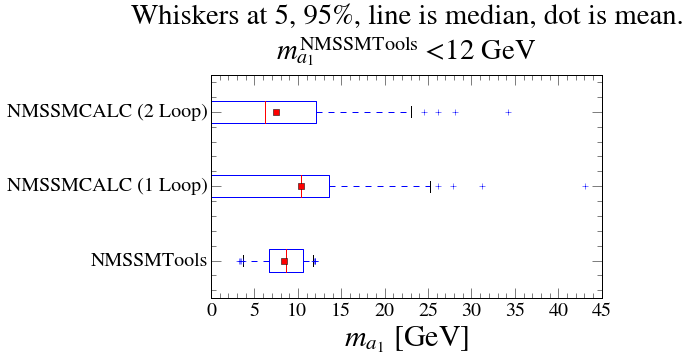

In [138]:
plt.boxplot([df_M3MU3MQ3AU3_1LOOP_pass_all[df_M3MU3MQ3AU3_1LOOP_pass_all.ma1 <12].ma1.values, 
             df_M3MU3MQ3AU3_1LOOP_pass_all[df_M3MU3MQ3AU3_1LOOP_pass_all.ma1<12].ma1_nc.values, 
             df_M3MU3MQ3AU3_2LOOP_pass_all[df_M3MU3MQ3AU3_2LOOP_pass_all.ma1<12].ma1_nc.values], 
            sym=None, vert=False, whis=[5, 95], labels=['NMSSMTools', 'NMSSMCALC (1 Loop)', 'NMSSMCALC (2 Loop)'], 
            showmeans=True)
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.minorticks_on()
plt.title("Whiskers at 5, 95%, line is median, dot is mean. \n$m_{a_1}^{\mathrm{NMSSMTools}} < 12$ GeV", y=1.04)

#$BR(h_1 \to XX)$ 

NMSSMCALC also calculates BRs for the Higgs. Let's look at $h_1$ first.

In [9]:
nmssmtools_col = 'green'
nc_1_col = 'dodgerblue'
nc_2_col = 'purple'

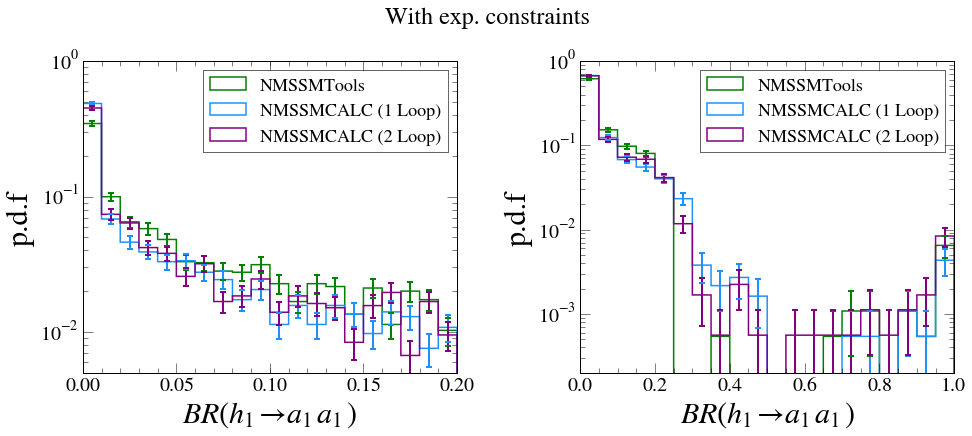

In [18]:
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
br_x=r'$BR(h_1 \to a_1a_1)$'
bins = 20
br_range = [0,0.2]

log = True
ax1 = fig.add_subplot(1,2,1)
plot_histogram(ax1, var='Brh1a1a1', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='Brh1a1a1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='Brh1a1a1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all[(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=5E-3)
plt.legend(fontsize=18)

ax2 = fig.add_subplot(1,2,2)
br_range = [0,1]
log = True
plot_histogram(ax2, var='Brh1a1a1', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='Brh1a1a1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='Brh1a1a1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all[(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=2E-4)
plt.legend(fontsize=18)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.suptitle(title, y=1.04)

In [14]:
df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)].Brh1a1a1_nc.describe()

count    1.845000e+03
mean     5.852018e-02
std      1.071501e-01
min      6.729248e-17
25%      3.610651e-05
50%      1.160798e-02
75%      7.610272e-02
max      9.976800e-01
Name: Brh1a1a1_nc, dtype: float64

Some differences here - most noticeably that NMSSMCALC has non-zero BR > 0.2 or so, whilst there are very few of these points for NMSSMCALC. I guess this is due to more points with $h_{125} = h_2$ in NMSSMCALC compared to NMMSMTools. 



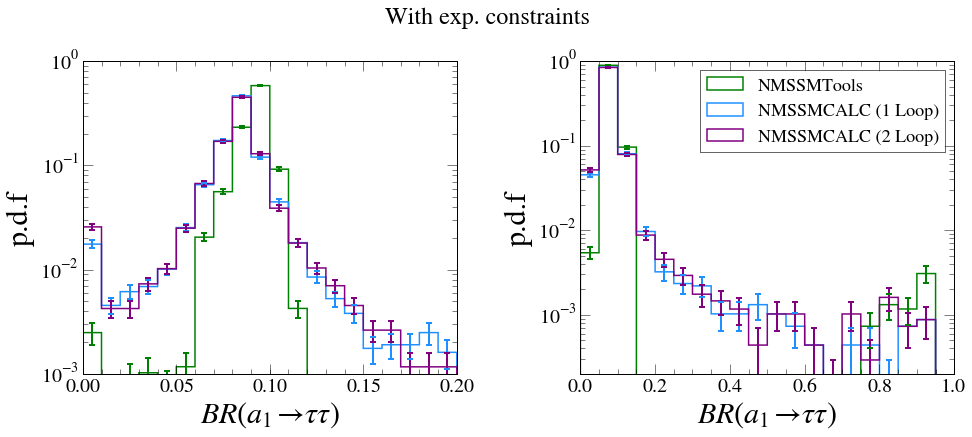

In [11]:
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
br_x=r'$BR(a_1 \to \tau\tau)$'
bins = 20
br_range = [0,0.2]

log = True
ax1 = fig.add_subplot(1,2,1)
plot_histogram(ax1, var='Bra1tautau', df=df_M3MU3MQ3AU3_1LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='Bra1tautau_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='Bra1tautau_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=1E-3)
# plt.legend(fontsize=18, loc=0)

ax2 = fig.add_subplot(1,2,2)
br_range = [0,1]
log = True
plot_histogram(ax2, var='Bra1tautau', df=df_M3MU3MQ3AU3_1LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='Bra1tautau_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='Bra1tautau_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=2E-4)
plt.legend(fontsize=18)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.suptitle(title, y=1.04)

However, this hides a lot of information, since the BR is hugely dependent on what $m_{a_1}$ we are considering. Let's redo the plot, but this time as a function of $m_{a_1}$ as well.

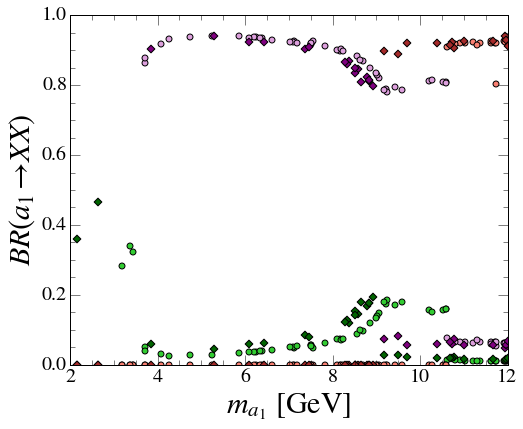

In [74]:
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")
fig = plt.figure()
fig.set_size_inches(14,6)
title = 'With exp. constraints'
ylabel = r'$BR(a_1 \to XX)$'
xlabel = r'$m_{a_1}\ \mathrm{[GeV]}$'

ax1 = fig.add_subplot(1,2,1)
plot_scatter(ax1, xvar='ma1', yvar='Bra1tautau', df=df_M3MU3MQ3AU3_1LOOP_pass_all, 
             label='NMSSMTools', c='plum', alpha=1, s=35)
plot_scatter(ax1, xvar='ma1_nc', yvar='Bra1tautau_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, 
             label='NMSSMCALC (2 loop)', c='purple', alpha=1, s=30, marker='D')
plot_scatter(ax1, xvar='ma1', yvar='Bra1gg', df=df_M3MU3MQ3AU3_1LOOP_pass_all, 
             label='NMSSMTools', c='limegreen', alpha=1, s=35)
plot_scatter(ax1, xvar='ma1_nc', yvar='Bra1gg_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, 
             label='NMSSMCALC (2 loop)', c='darkgreen', alpha=1, s=30, marker='D')
plot_scatter(ax1, xvar='ma1', yvar='Bra1bb', df=df_M3MU3MQ3AU3_1LOOP_pass_all, 
             label='NMSSMTools', c='salmon', alpha=1, s=35)
plot_scatter(ax1, xvar='ma1_nc', yvar='Bra1bb_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all, 
             label='NMSSMCALC (2 loop)', c='brown', alpha=1, s=30, marker='D')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim([2,12])
plt.ylim([0,1])
plt.legend(loc=0)

Circles = NMSSMTools, Diamonds = NMSSMCALC (2 loop) [1 loop is v.similar]

Purple = $a_1 \to \tau\tau$

Green = $a_1 \to gg$

Red/brown = $a_1 \to bb$

Note here that the $m_{a_1}$ on the x axis is the mass as calculated using the relevant tools (so the mass taken from NMSSMCALC for the blue and red points).

**Very** interesting is the region for $9 < m_{a_1} < 11$ GeV - NMSSMTools has a large BR, whilst the BR form NMSSMCALC immediately drops.

#$m_{\tilde{t}}$ 

Maybe it is something to do with the stop mass?

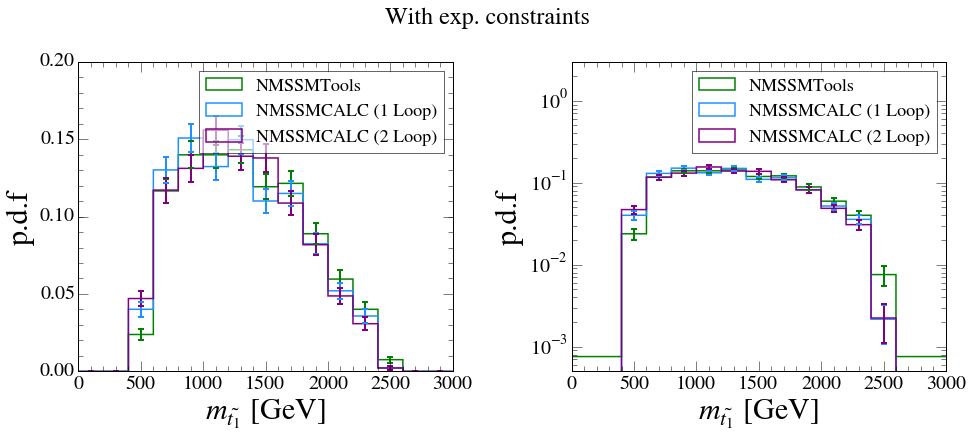

In [28]:
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', 'pdf'")

fig = plt.figure()
fig.set_size_inches(14,6)
title='With exp. constraints'
br_x=r'$m_{\tilde{t_1}}\ \mathrm{[GeV]}$'
bins = 15
br_range = [0,3000]

log = False
ax1 = fig.add_subplot(1,2,1)
plot_histogram(ax1, var='mstop1', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='mstop1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax1, var='mstop1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all[(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=0, top=0.2)
plt.legend(fontsize=18)

ax2 = fig.add_subplot(1,2,2)
# br_range = [0,1]
log = True
plot_histogram(ax2, var='mstop1', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMTools', errorbars=True, normed=True, color=nmssmtools_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='mstop1_nc', df=df_M3MU3MQ3AU3_1LOOP_pass_all[(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_1LOOP_pass_all.Brh1a1a1>0)], 
               xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (1 Loop)', errorbars=True, normed=True, color=nc_1_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plot_histogram(ax2, var='mstop1_nc', df=df_M3MU3MQ3AU3_2LOOP_pass_all[(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1_nc>0)&(df_M3MU3MQ3AU3_2LOOP_pass_all.Brh1a1a1>0)], xlabel=br_x, ylabel='p.d.f',
               label='NMSSMCALC (2 Loop)', errorbars=True, normed=True, color=nc_2_col, histtype="step", 
               linewidth=1.5, bins=bins, range=br_range, log=log)
plt.ylim(bottom=5E-4, top=3)
plt.legend(fontsize=18)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.suptitle(title, y=1.04)

In [243]:
x = np.random.lognormal(mean=2.25, sigma=0.75, size=37000)
x2 = np.random.lognormal(mean=1.25, sigma=0.75, size=37000)

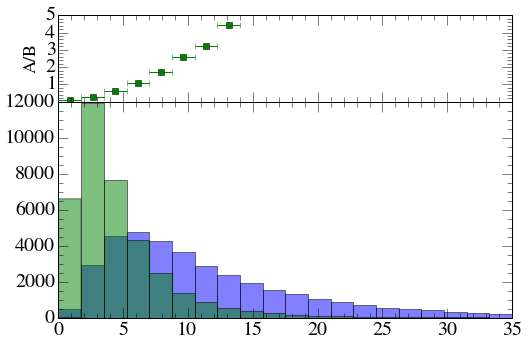

In [245]:
#  axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
# bp = bpAx.boxplot([x, x2], vert=False, labels=['dist', 'dist2'])
h, bins, patch = histAx.hist(x, bins=20, range=[0,35], alpha=0.5)
h2, bins2, patch2 = histAx.hist(x2, bins=20, color='green', range=[0,35], alpha=0.5)
h_div = np.divide(h,h2)

bin_centers = [0.5*(bins[i+1]+bins[i]) for i, bin in enumerate(bins[:-1])]
bp = bpAx.errorbar(bin_centers, h_div, xerr=0.5*(bins[1]-bins[0]), fmt='gs')
bpAx.set_ylim(0,5)
bpAx.set_ylabel('A/B', fontsize=18)


bpAx.minorticks_on()
# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
ticks = bpAx.get_yticklabels()
newticks=[t.get_text() for t in ticks]
newticks = ['', '1', '2', '3', '4', '5']
bpAx.set_yticklabels(newticks)  # clear out overlapping xlabels
plt.minorticks_on()